In [251]:
import os
import re
import math
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from sklearn.metrics import mean_squared_error

In [227]:
key = '25fbcfcfe21fbc7092cffaef0b76d44ab5982d6e'
df = pdr.get_data_tiingo('GOOG', api_key=key)
df.to_csv('GOOG.csv')

In [228]:
df1 = pd.read_csv('GOOG.csv')

In [229]:
df1.reset_index()['close']

0        536.70
1        533.33
2        526.83
3        526.69
4        536.69
         ...   
1252    1417.02
1253    1417.84
1254    1416.73
1255    1428.92
1256    1431.82
Name: close, Length: 1257, dtype: float64

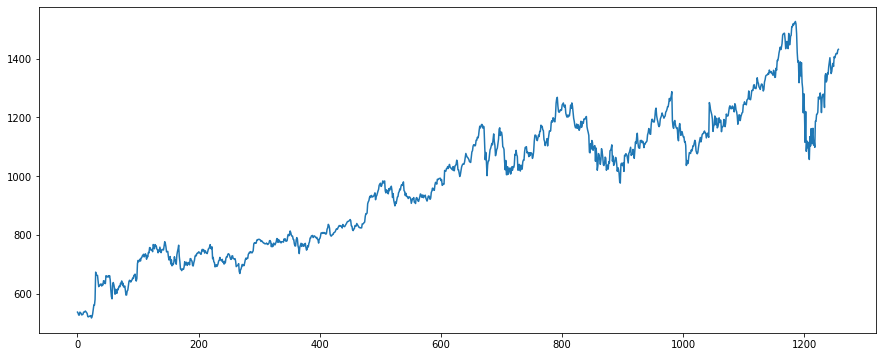

In [230]:
plt.figure(figsize=(15,6))
plt.plot(df1['close'])

In [231]:
#  LSTM is very sensative to the Scale of data , scaling data to range 0-1

scale = MinMaxScaler(feature_range=(0,1))
df2 = scale.fit_transform(np.array(df['close']).reshape(-1,1))
df2

array([[0.01967599],
       [0.0163389 ],
       [0.00990236],
       ...,
       [0.89111362],
       [0.9031846 ],
       [0.90605629]])

In [232]:
#  split data to test and train
train_data= int(len(df2)*.7)
test_data = int(len(df2)-train_data)
train_data, test_data = df2[:train_data, :], df2[train_data:, :1]

In [233]:
training_data.shape, testing_data.shape

((879, 1), (378, 1))

In [234]:
#  dividing data into trainig and testing
def prepare_data(data, step):
    dataX, dataY = [], []
    for i in range(len(data)-step-1):
        a = data[i:(i+step), 0]  
        dataX.append(a)
        dataY.append(data[i + step, 0])
    return np.array(dataX), np.array(dataY)

In [235]:
steps=100
X_train, y_train = prepare_data(train_data, steps)
X_test, y_test = prepare_data(test_data, steps)


In [236]:
# reshaping training and testing data

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [237]:
model= Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [238]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=64, verbose=2)

Epoch 1/100
13/13 - 4s - loss: 0.0507 - val_loss: 0.0536
Epoch 2/100
13/13 - 2s - loss: 0.0082 - val_loss: 0.0065
Epoch 3/100
13/13 - 2s - loss: 0.0035 - val_loss: 0.0099
Epoch 4/100
13/13 - 2s - loss: 0.0016 - val_loss: 0.0085
Epoch 5/100
13/13 - 2s - loss: 0.0013 - val_loss: 0.0064
Epoch 6/100
13/13 - 2s - loss: 0.0013 - val_loss: 0.0070
Epoch 7/100
13/13 - 2s - loss: 0.0012 - val_loss: 0.0053
Epoch 8/100
13/13 - 2s - loss: 0.0011 - val_loss: 0.0058
Epoch 9/100
13/13 - 2s - loss: 0.0011 - val_loss: 0.0072
Epoch 10/100
13/13 - 2s - loss: 0.0012 - val_loss: 0.0055
Epoch 11/100
13/13 - 2s - loss: 0.0010 - val_loss: 0.0052
Epoch 12/100
13/13 - 2s - loss: 0.0011 - val_loss: 0.0050
Epoch 13/100
13/13 - 2s - loss: 0.0011 - val_loss: 0.0045
Epoch 14/100
13/13 - 2s - loss: 0.0010 - val_loss: 0.0045
Epoch 15/100
13/13 - 2s - loss: 0.0010 - val_loss: 0.0043
Epoch 16/100
13/13 - 2s - loss: 0.0010 - val_loss: 0.0042
Epoch 17/100
13/13 - 2s - loss: 9.9198e-04 - val_loss: 0.0044
Epoch 18/100
13/13 

In [245]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [248]:
train_predict = scale.inverse_transform(train_predict)
test_predict =scale.inverse_transform(test_predict)

train_predict

In [253]:
math.sqrt(mean_squared_error(y_train, train_predict))

928.8422179113842

In [254]:
math.sqrt(mean_squared_error(y_test, test_predict))

1256.8887584276756

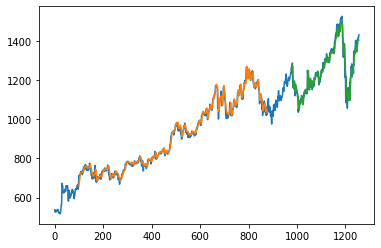

In [258]:
## Plotting 
# shift train predictions for plotting
plt.figure(fig_size)
look_back=100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scale.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:

lst_out = []
i=0

while(i<30):
    if(len(temp_input)==len(X_input)):
        X_input = X_input.reshape((1, n_features, features))
        yhat = model.predict(X_input,verbose=0)
        temp_input.append(yhat[0][0])
        lst_out.append(yhat[0][0])
        lst_out.append(yhat[0][0])
        i+=1
    else:
        X_input = np.asarray(temp_input[i:])
        X_input = X_input.reshape((1, n_features,features))
        yhat = model.predict(X_input,verbose=0)
        temp_input.append(yhat[0][0])
        lst_out.append(yhat[0][0])
        i+=1
       
        
lst_out